In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
#loading dataset
dataset =pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.tail()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#finding number of unique values in each column
print(dataset.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [ ]:
missing_info =dataset.isnull().sum()
print(missing_info)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


no missing values

In [ ]:
dataset=dataset.drop(['Surname'], axis=1);

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


map encoding to convert object to int

In [ ]:
map1={'Female':0,'Male':1}
map2={'France':0,'Spain':1,'Germany':2}
dataset['Gender'] = dataset['Gender'].map(map1)
dataset['Geography'] = dataset['Geography'].map(map2)

In [ ]:
#target column analysis
dataset['Exited'].unique()

array([1, 0])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


Data Visualization

Text(0, 0.5, 'Exited')

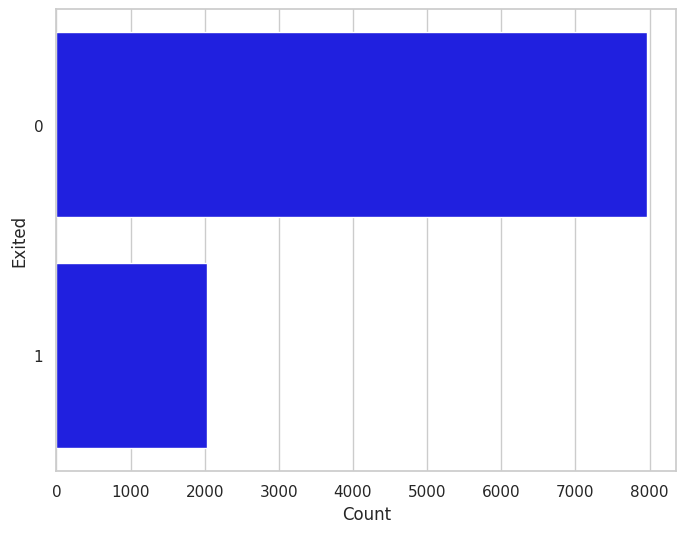

In [ ]:

# Set up Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
counts = dataset.Exited.value_counts()
sns.barplot(x=counts, y=counts.index, color="blue", orient='h')
plt.xlabel('Count')
plt.ylabel('Exited')

In [ ]:
labelcounts= dataset['Exited'].value_counts()

# Print the counts
print(labelcounts)

0    7963
1    2037
Name: Exited, dtype: int64


it can be deduced that data is imbalanced.

**Balancing the dataset by oversampling**


In [ ]:
# over-sample the minority class i.e. Exited=1

majority_class = counts.idxmax()
n_samples = counts[majority_class]
over_sampled_dataset = dataset.groupby('Exited').apply(lambda x: x.sample(n_samples, replace=True)).reset_index(drop=True)

Text(0, 0.5, 'Exited')

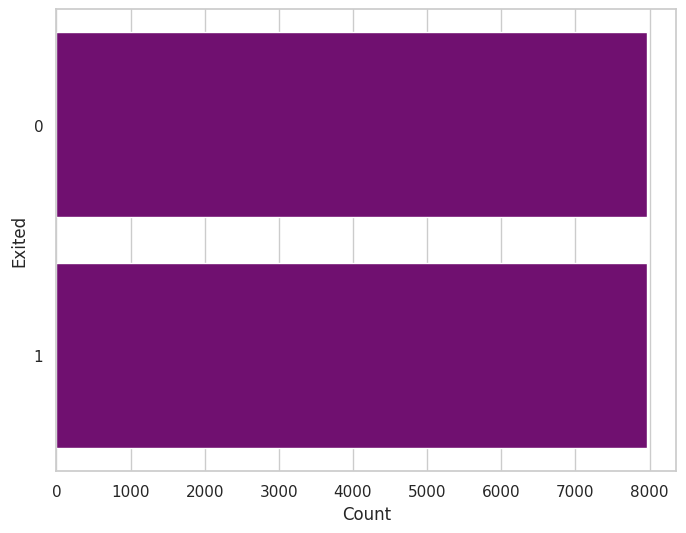

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
over_sampled_counts = over_sampled_dataset.Exited.value_counts()
sns.barplot(x=over_sampled_counts, y=over_sampled_counts.index, color="purple", orient='h')
plt.xlabel('Count')
plt.ylabel('Exited')

In [ ]:

print('Original dataset shape is',dataset.shape)
print('Vver sampled dataset shape is ',over_sampled_dataset.shape)

Original dataset shape is (10000, 13)
Vver sampled dataset shape is  (15926, 13)


binary classification problem

correlation matrix

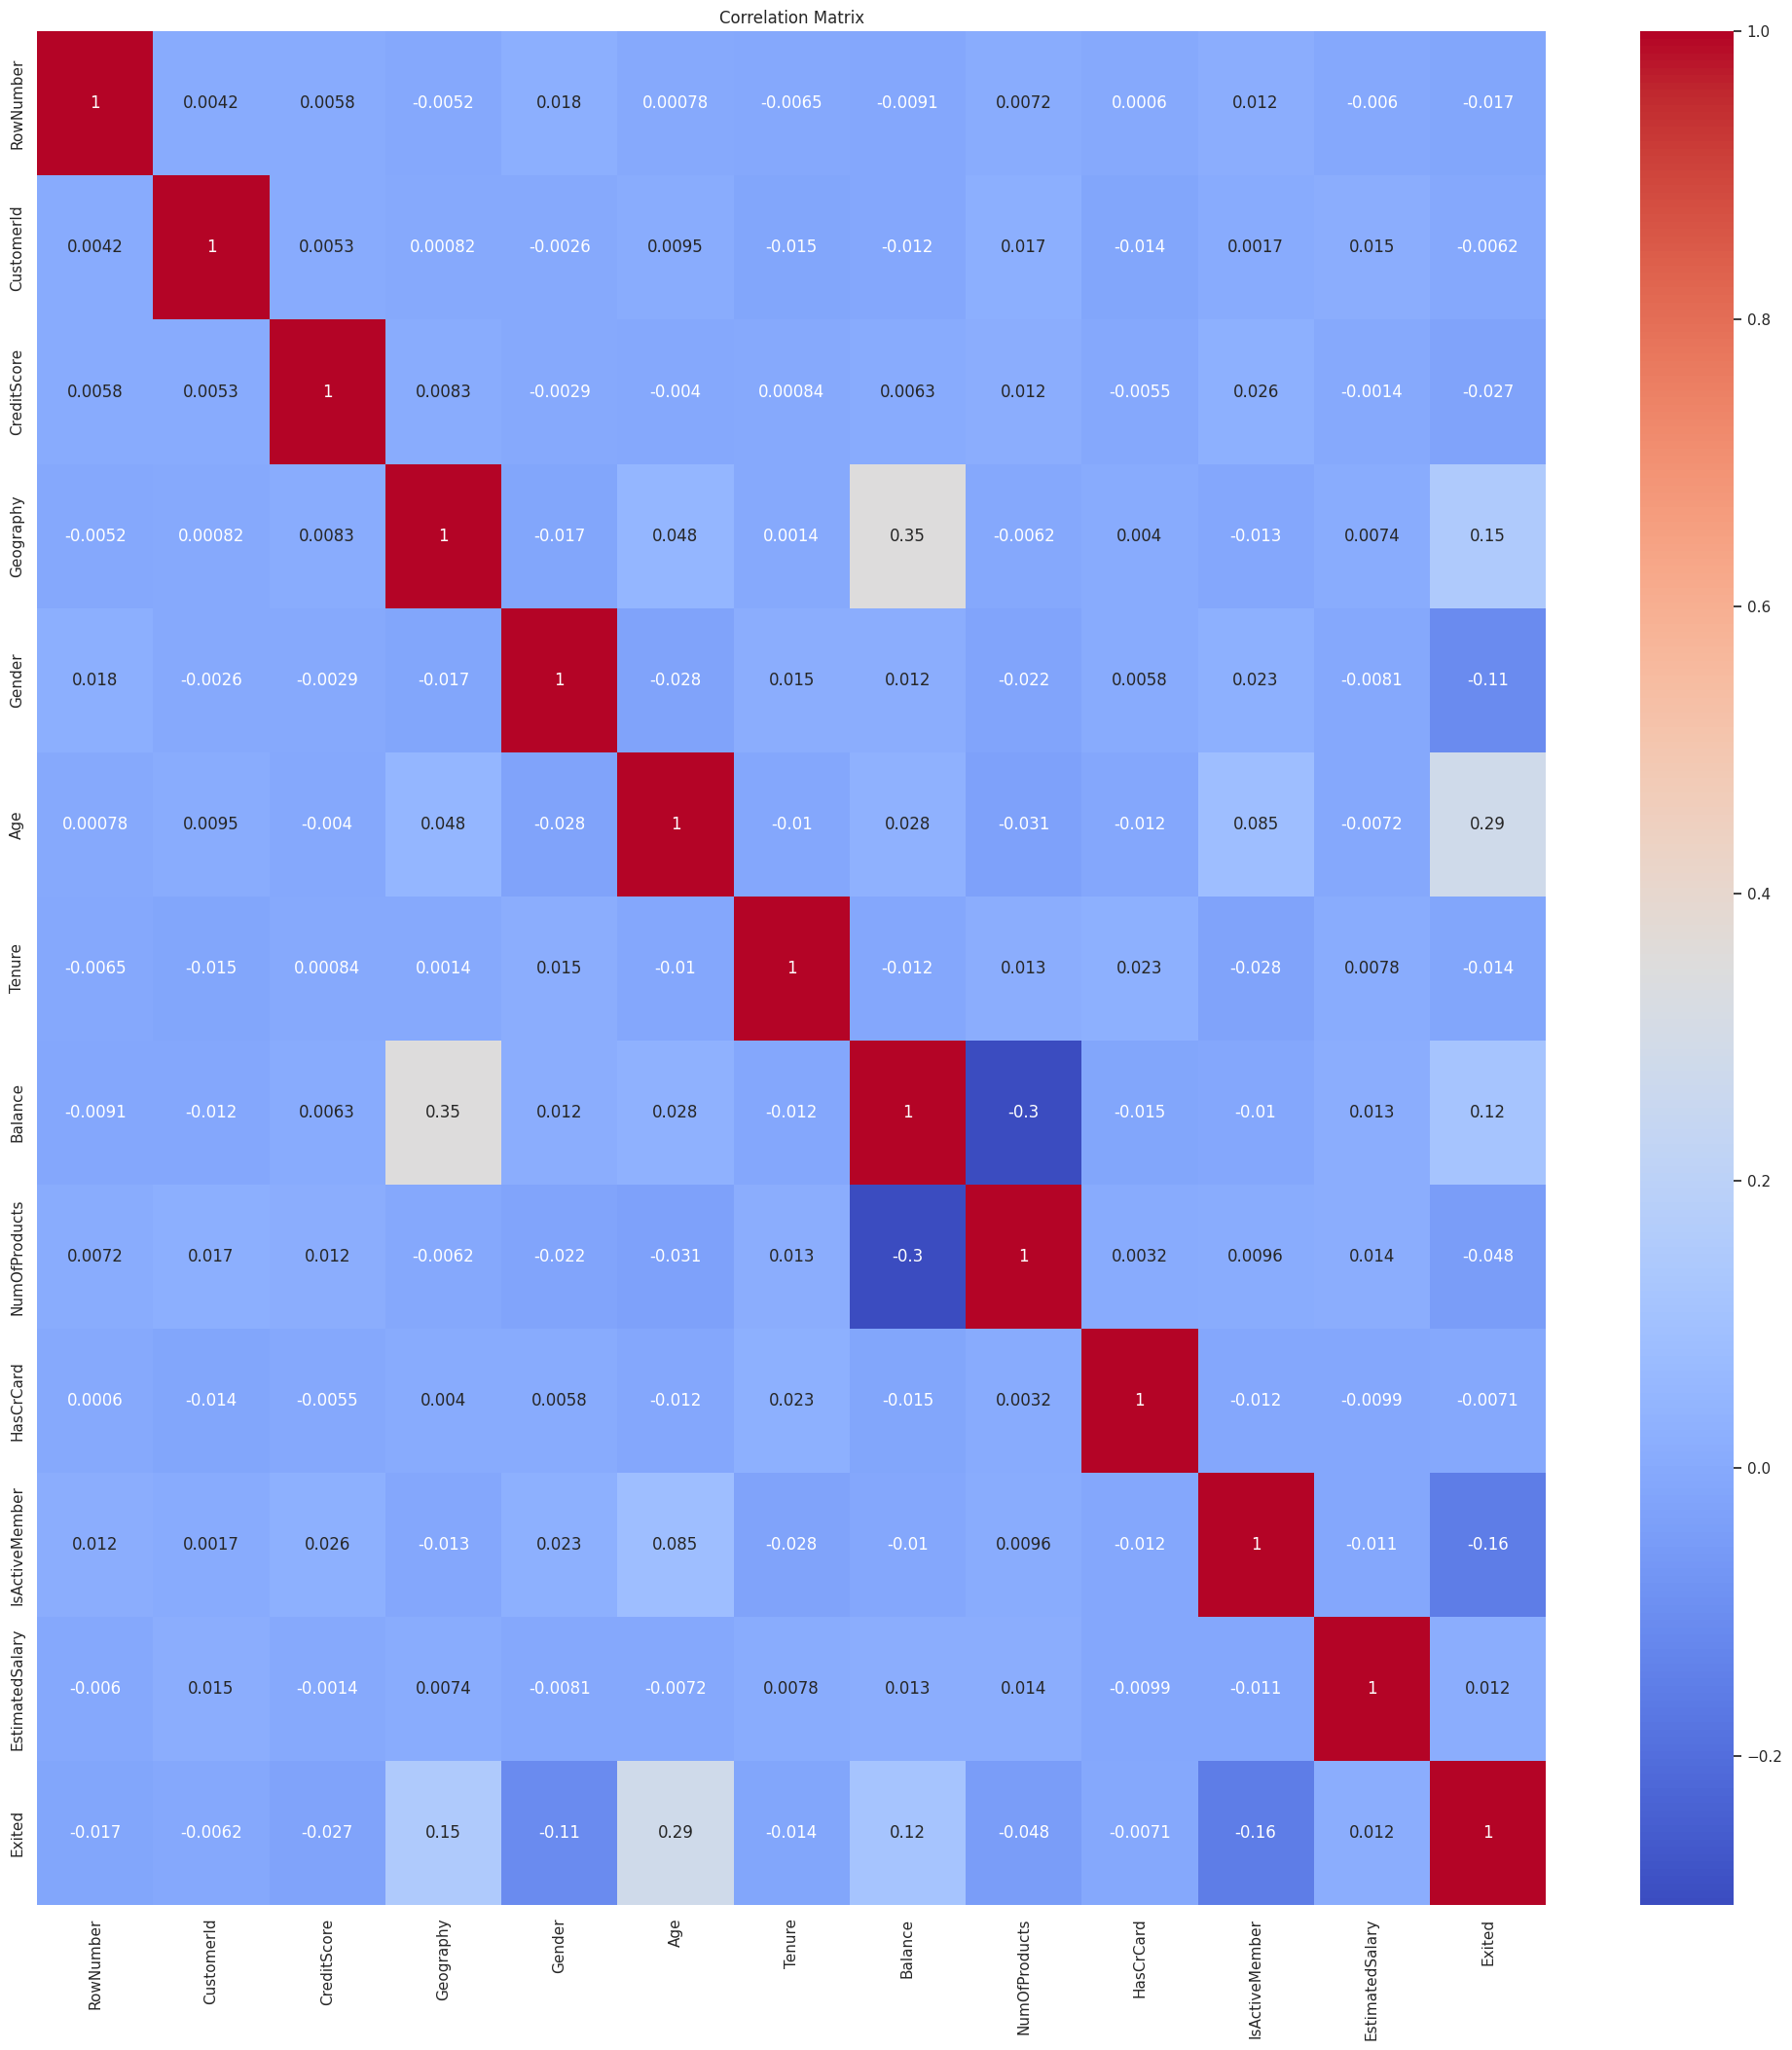

In [ ]:
#To Check Correlation of The Features with the Target Feature i.e. Loan Status
corr_matrix=dataset.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
best_features=corr_matrix.index[abs(corr_matrix['Exited'])>0.3]

the attributes don't have a considerably high correlation with the target attribute


# **Checking for outliers**

Box Plots:

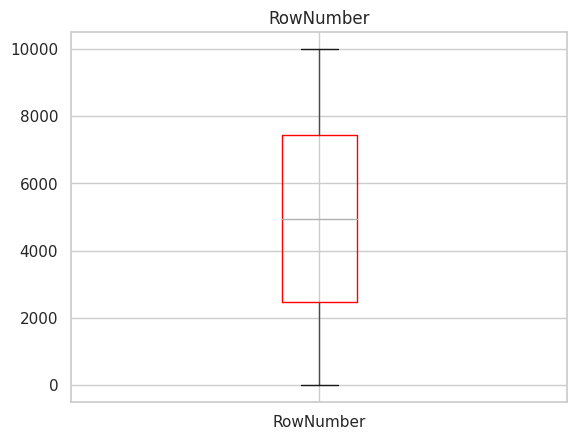

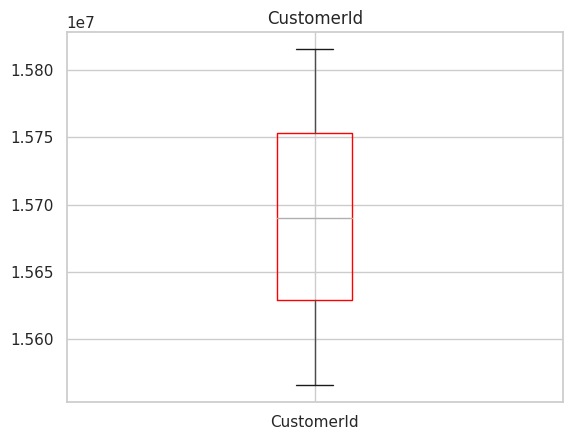

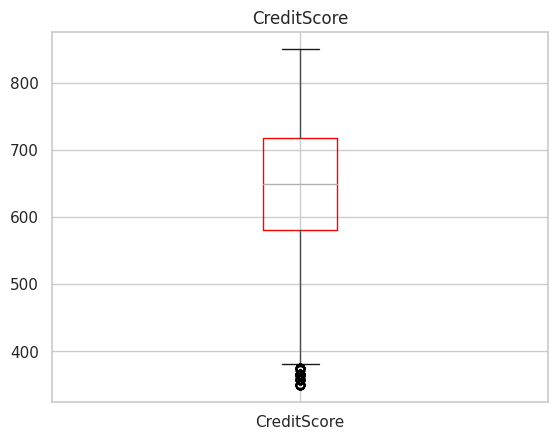

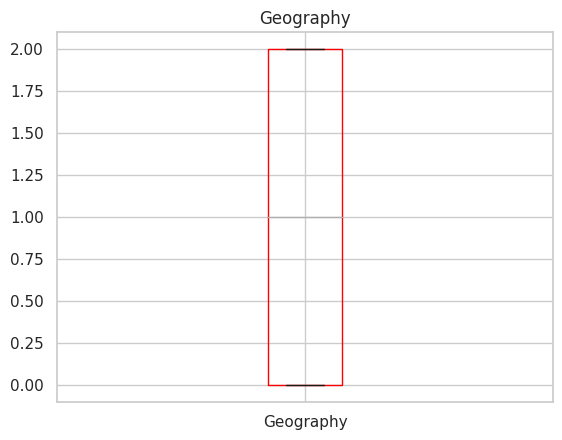

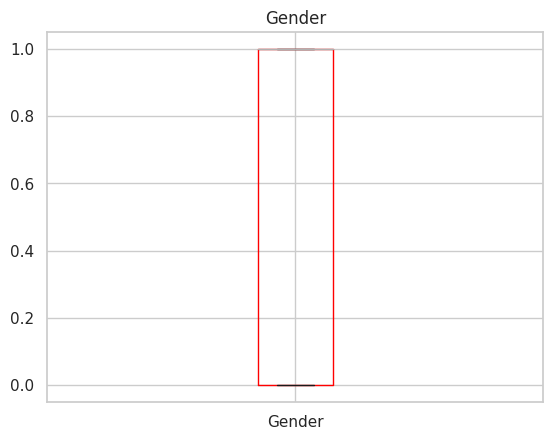

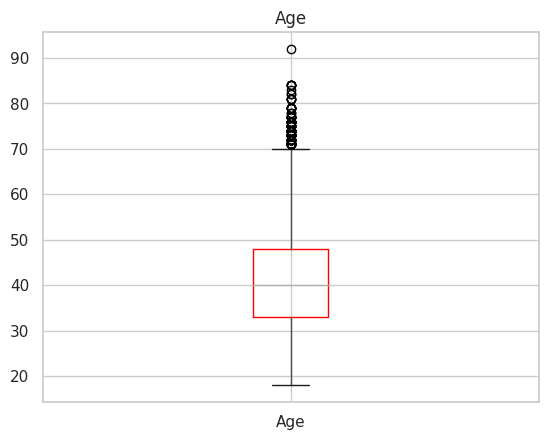

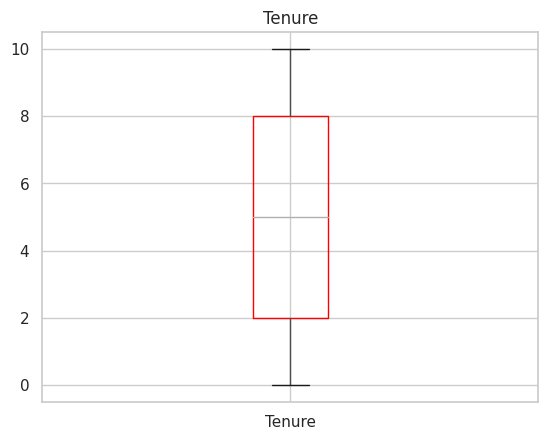

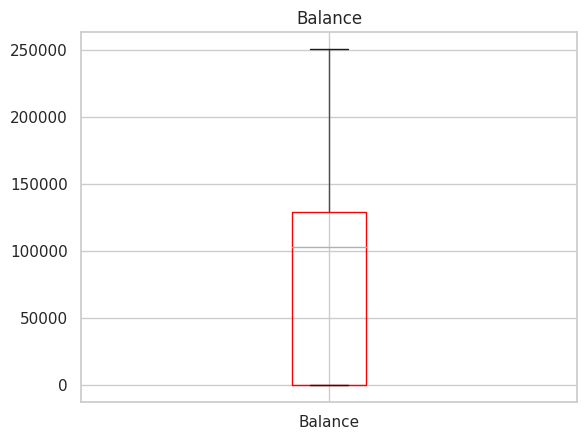

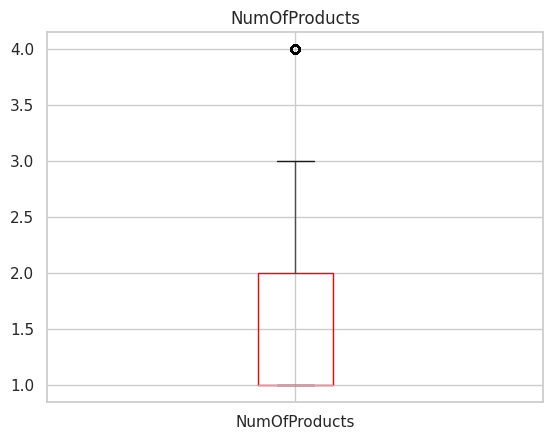

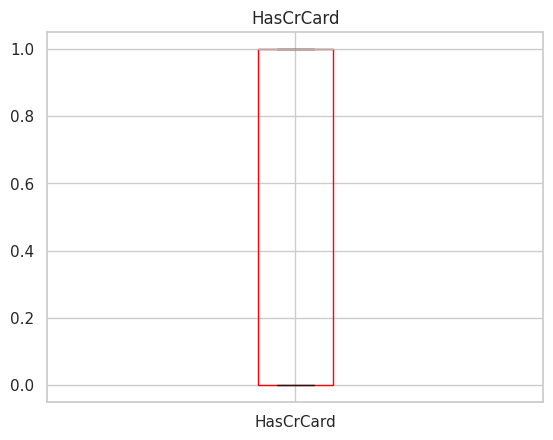

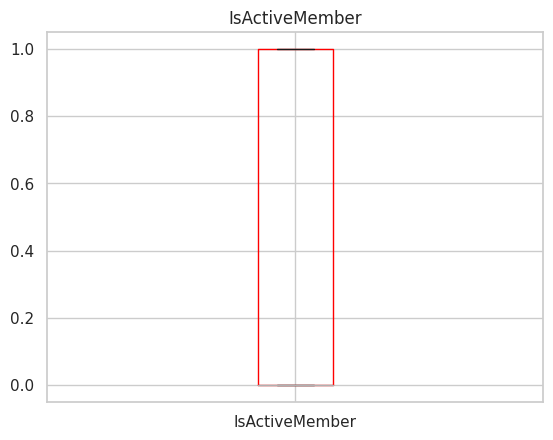

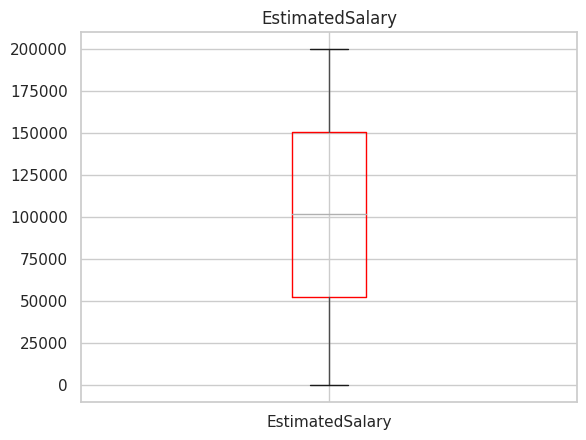

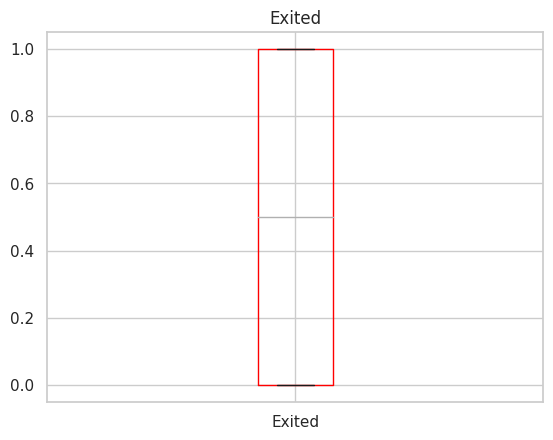

In [ ]:
# BOX PLOT:
for column in dataset:
    over_sampled_dataset[[column]].boxplot(boxprops=dict(color='red'))
    plt.title(column)
    plt.show()

In [ ]:
X = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

Removing Outliers through IQR method:

In [ ]:

cols=["CreditScore","Age","NumOfProducts"]
print("Skewness of ")
print("Before Removing Outliers")
for column in cols:
  print(column,X[column].skew())
  Q1=X[column].quantile(0.25)
  Q3=X[column].quantile(0.75)
  IQR=Q3-Q1
  upper_limit = Q3 +  IQR*1.5
  lower_limit = Q1 - IQR*1.5
  X[column] = np.where(
        X[column] > upper_limit,
        upper_limit,
        np.where(
            X[column] < lower_limit,
            lower_limit,
            X[column]
        )
    )
#Checking Skewness of the indicated columns in cols after removing outliers
print("After Removing Outliers")
for column in cols:
  print(column,X[column].skew())

Skewness of 
Before Removing Outliers
CreditScore -0.07160660820092675
Age 1.0113202630234552
NumOfProducts 0.7455678882823168
After Removing Outliers
CreditScore -0.06425547313963796
Age 0.630314700010664
NumOfProducts 0.5672445027274912


After handling outliers:

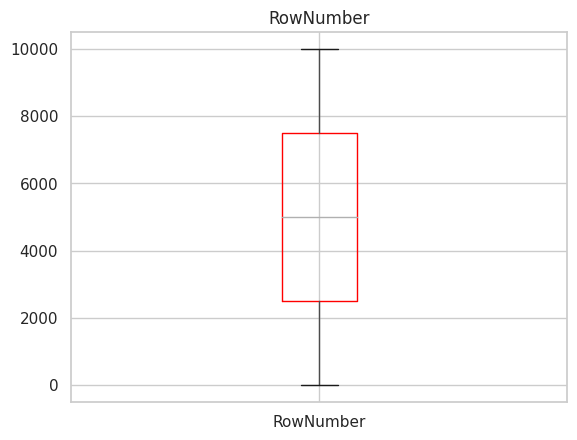

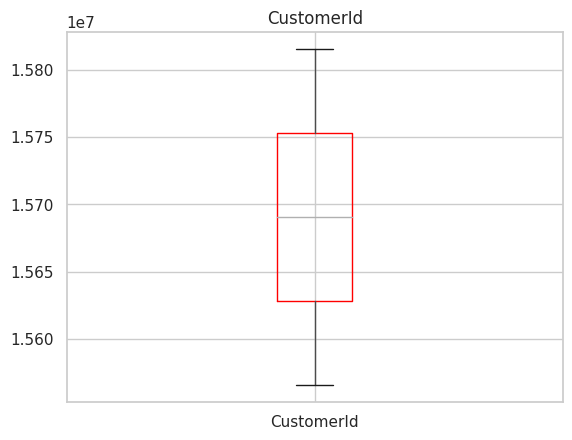

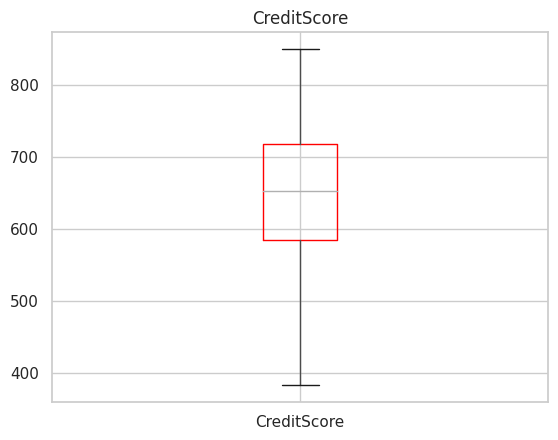

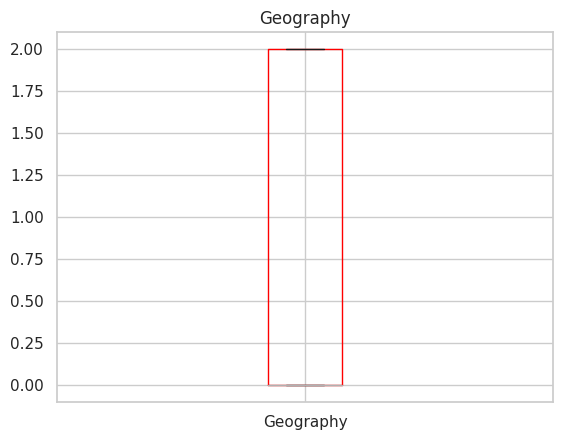

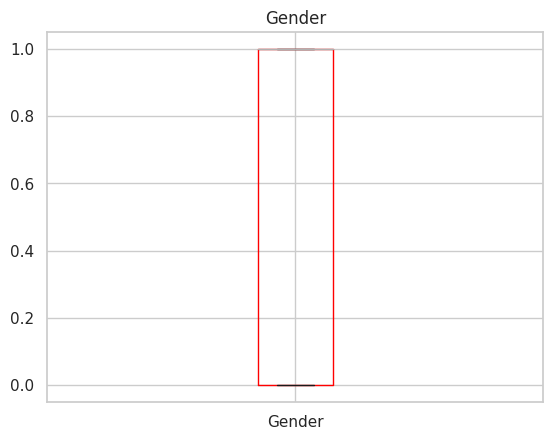

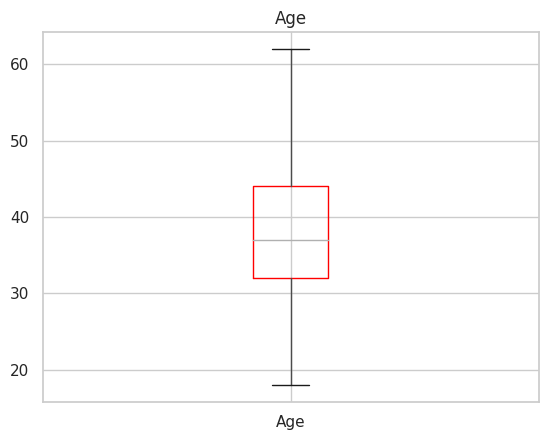

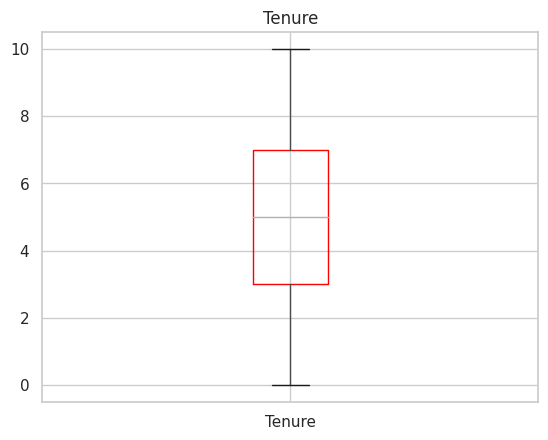

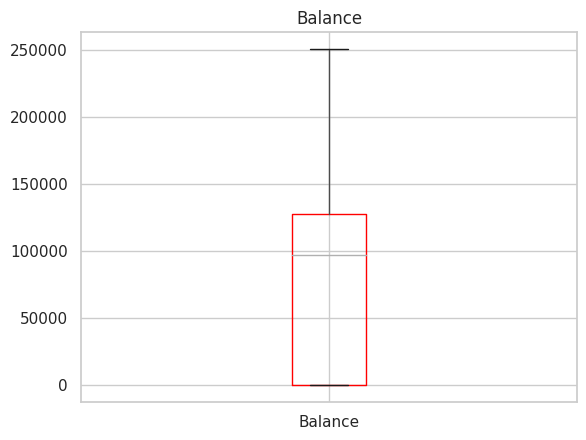

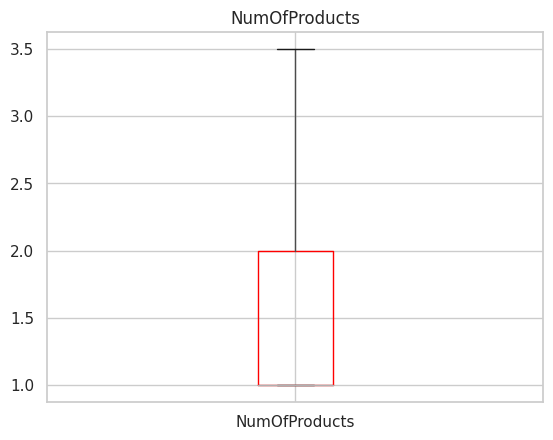

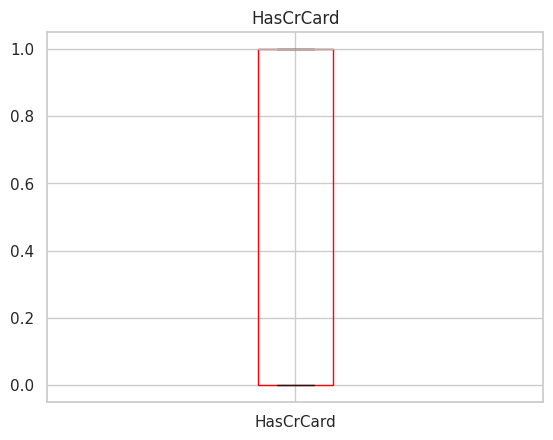

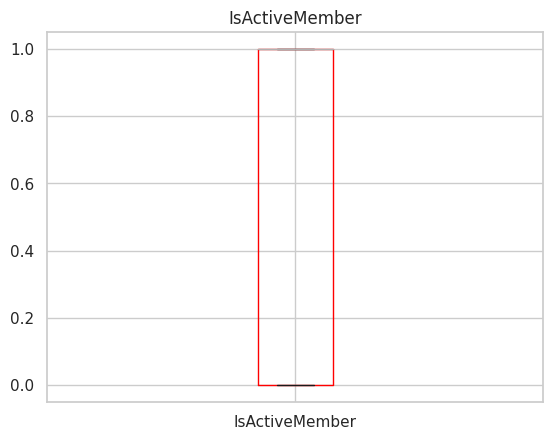

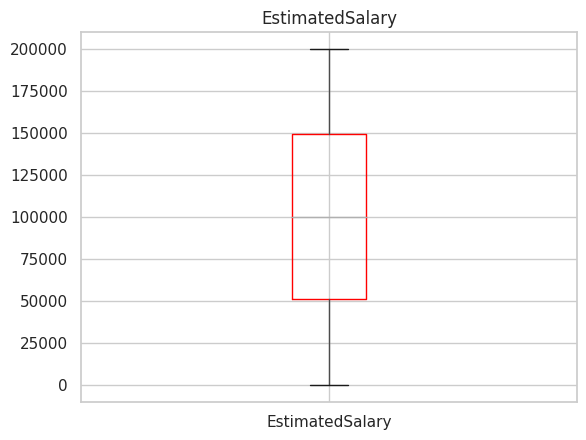

In [ ]:
# BOX PLOT:
for column in X:
    X[[column]].boxplot(boxprops=dict(color='red'))
    plt.title(column)
    plt.show()

Since outliers have been successfully handled, next step is to train the models

# Model Training and Selection

In [ ]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=0)
#analysing different models and performance
model_list = [lr,dt,rf]
train_acc = []
for i in model_list:
    i_model = i.fit(X_train,y_train)
    ypred_train = i_model.predict(X_train)
    ypred_test = i_model.predict(X_test)
    print(i)
    print(classification_report(y_test, ypred_test))
    train_acc.append(accuracy_score(y_test,ypred_test))
print(train_acc)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2416
           1       0.48      0.53      0.51       584

    accuracy                           0.80      3000
   macro avg       0.68      0.70      0.69      3000
weighted avg       0.81      0.80      0.80      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(random_state=0)
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.47      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000

[0.8053333333333333, 0.798, 0.8716666666666667]


XGBoost

In [ ]:

dtrain = xgb.DMatrix(X_train, label=y_train) #Converting data into DMatrix format, which is the input format required by XGBoost
dtest = xgb.DMatrix(X_test, label=y_test)
params = { #specifying parameters
    "objective": "binary:logistic",
    "max_depth": 3,
    "eta": 0.1,
    "gamma": 0.1,
    "min_child_weight": 1,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "verbosity": 0
}
num_of_rounds = 100
model = xgb.train(params, dtrain, num_of_rounds) #training
y_pred = model.predict(dtest) #prediction
acc = accuracy_score(y_test, y_pred.round()) #calculating accuracy
print(f"Accuracy: {acc}")
print(classification_report(y_test, y_pred.round()))

Accuracy: 0.8673333333333333
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.86      0.87      0.85      3000



Accuracies:

Logistic Regression: 80.5%

Decision Tree: 79.8%

Random Forest: 87.1%

XGBoost: 86.7%

Since Random Forest has the highest accuracy, we'll apply hyperparameter tuning on it to improve accuracy

In [ ]:

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8618571428571429


In [ ]:

# Define the parameter grid to search through
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.8617142857142858


the accuracy even after hypertuning does not increase considerably. It is concluded that Random Forest is the selected model for this data